# Entendimento e Tratamento dos Dados:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/colabDataets/car_dataset_india.csv",sep="," )

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.shape

(10000, 11)

In [ ]:
data.head(10)

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0
5,6,Kia,Sonet,2020,Petrol,Manual,2780000.0,21.5,1800,7,23700.0
6,7,Toyota,Glanza,2019,CNG,Manual,2270000.0,29.7,1500,7,13300.0
7,8,Volkswagen,Taigun,2017,CNG,Manual,2770000.0,20.2,1800,4,10200.0
8,9,Renault,Lodgy,2015,Petrol,Manual,2180000.0,10.5,1800,5,18900.0
9,10,Kia,EV6,2019,CNG,Automatic,990000.0,16.1,1800,6,15400.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [ ]:
data['Brand'].unique()

array(['Toyota', 'Kia', 'Maruti Suzuki', 'Honda', 'Volkswagen', 'Renault',
       'Mahindra', 'Tata Motors', 'Skoda', 'Hyundai'], dtype=object)

In [ ]:
data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-01-01', format='%Y-%m-%d')


In [ ]:
data.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024-01-01,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023-01-01,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016-01-01,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019-01-01,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015-01-01,Electric,Manual,1840000.0,15.8,1000,5,5800.0


In [ ]:
type(data['Year'])

pandas.core.series.Series

In [ ]:
data.isna().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Fuel_Type,0
Transmission,0
Price,0
Mileage,0
Engine_CC,0
Seating_Capacity,0


1) Quantidade de vendas de carros ao longo dos anos

In [ ]:
qtd = len(data)
qtd

10000

# Respondendo questões a partir de análises:

1) Qual é a marca de carro mais popular no mercado indiano com base no número de modelos disponíveis?

In [ ]:
bestSelling = data['Brand'].value_counts()
bestSelling

,count
Brand,
Maruti Suzuki,1042
Volkswagen,1034
Hyundai,1033
Mahindra,1024
Skoda,1011
Tata Motors,989
Honda,982
Kia,973
Renault,958


2) Qual é a distribuição de preços dos carros por marca?

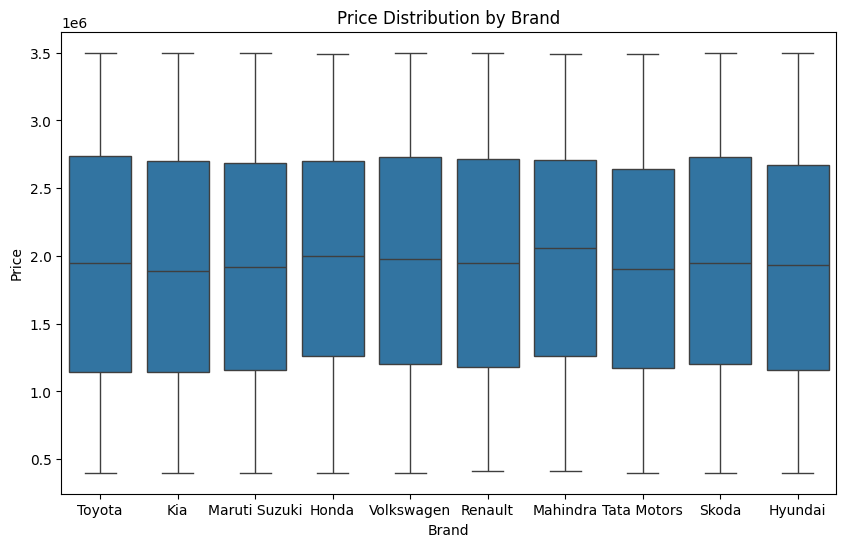

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= data['Brand'], y= data['Price'])
plt.title('Price Distribution by Brand')
plt.show()

3) Qual tipo de combustível é mais comum entre os carros disponíveis?

In [ ]:
commonFuels = data['Fuel_Type'].value_counts()
commonFuels

,count
Fuel_Type,
CNG,2588
Electric,2518
Diesel,2468
Petrol,2426


4) Como a quilometragem (eficiência de combustível) varia entre carros a gasolina, diesel, GNV e elétricos?

In [ ]:
fuelEfficiency = data.groupby('Fuel_Type')['Mileage'].mean()
fuelEfficiency

,Mileage
Fuel_Type,
CNG,20.095672
Diesel,20.003363
Electric,19.851509
Petrol,19.913850


5) Como o custo anual de manutenção (Service_Cost) varia entre marcas e modelos?

In [ ]:
cost = data.groupby('Brand')['Service_Cost'].mean()
cost = cost.sort_values(ascending=True)
cost

,Service_Cost
Brand,
Honda,14644.704684
Hyundai,14711.519845
Skoda,14957.171118
Tata Motors,14983.417594
Volkswagen,14992.069632
Kia,15008.221994
Mahindra,15027.050781
Toyota,15065.932914
Maruti Suzuki,15094.433781


6) Qual é a proporção de carros com transmissão manual versus automática?

/tmp/ipython-input-1924146919.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_types, y=counts, palette='viridis')


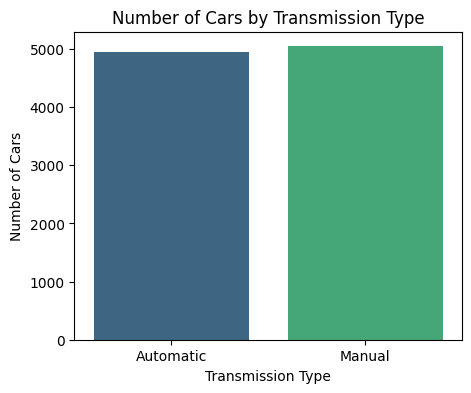

In [ ]:
automatic_count = data[data['Transmission'] == 'Automatic'].shape[0]
manual_count = data[data['Transmission'] == 'Manual'].shape[0]
transmission_types = ['Automatic', 'Manual']
counts = [automatic_count, manual_count]

plt.figure(figsize=(5, 4))
sns.barplot(x=transmission_types, y=counts, palette='viridis')

plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()

7) Qual a quantidade de carros vendida ao longo dos anos?

/tmp/ipython-input-2016663194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas['Year'], y=vendas['Vendas'], palette='Blues_r')


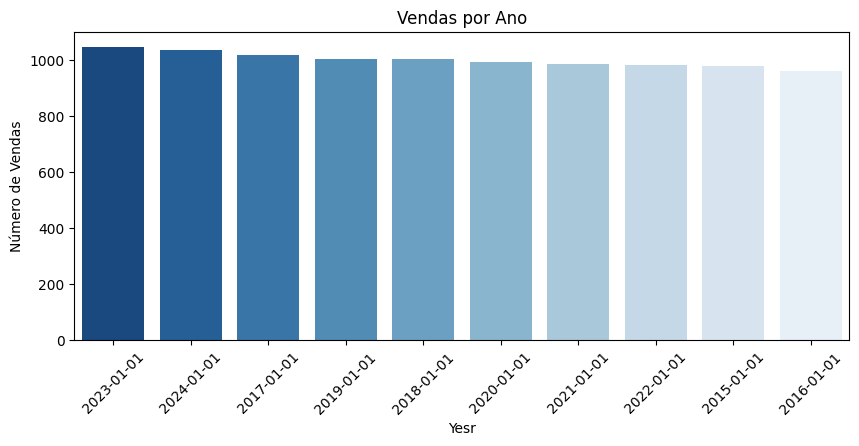

In [ ]:
vendas = data['Year'].value_counts().reset_index()
vendas.columns = ['Year', 'Vendas']

plt.figure(figsize=(10, 4))
sns.barplot(x=vendas['Year'], y=vendas['Vendas'], palette='Blues_r')

plt.title("Vendas por Ano")
plt.xlabel("Yesr")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=45)
plt.show()
